In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data science project\Data_Science_Project\Dataset\hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


## About Dataset

* satisfaction_level	The level of satisfaction of the employee
* last_evaluation	The score of the last evaluation of the employee
* number_project	The number of projects the employee has worked on
* average_montly_hours	The average monthly hours worked by the employee
* time_spend_company	The number of years the employee has spent at the company
* Work_accident	Whether the employee had a work accident (1 = yes, 0 = no)
* left	  Whether the employee has left the company (1 = yes, 0 = no)
* promotion_last_5years	   Whether the employee had a promotion in the last 5 years (1 = yes, 0 = no)
* sales	  The department the employee works in
* salary	The salary level of the employee (low, medium, high)

In [3]:
df.shape

(15004, 11)

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'age'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


* There are 15004 non-null values for all the column i.e no null values only 2 columns Salary and age has a 14975 and 3080 non-null values i.e it has missing rows.




<b> Note: </b>

Based on the data types and the feature explanations provided earlier, we identified that 5 columns(Work_accident, left, promotion_last_5years, sales, salary) are categorical in terms of their semantics. so we convert the feature into string data types

In [6]:

df['promotion_last_5years'] = df['promotion_last_5years'].astype(object)
df['Work_accident'] = df['Work_accident'].astype(object)

In [7]:
df.describe(include='object')

,Work_accident,left,promotion_last_5years,Department,salary
count,15004,15004,15004,15004,14975
unique,2,3,2,10,3
top,0,0,0,sales,low
freq,12835,11428,14685,4140,7289


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,29.000000


In [9]:
df['left'].value_counts()

left
0    11428
1     3572
?        4
Name: count, dtype: int64

Employee left the company

* 1 -> yes
* 0 -> No
* ? -> Not sence(unknown)

so we replace the ? -> to NaN and handle the missing data

In [10]:
df['left'] = df['left'].replace('?',np.NaN)

## Visulize the categorical and numerical features vs target

In [11]:
continuous_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','age']

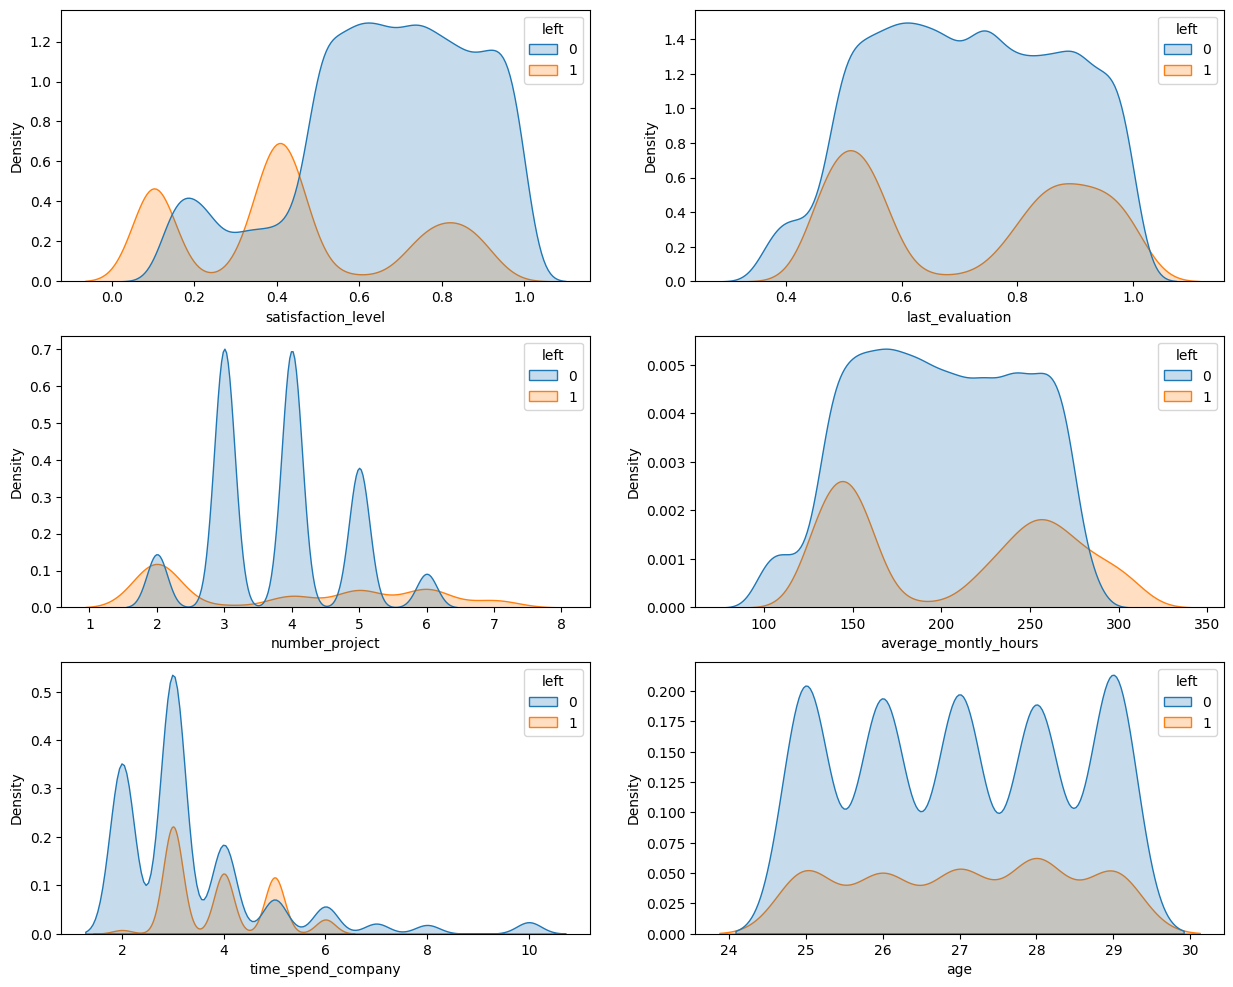

In [12]:
fig, axes = plt.subplots(3,2,figsize=(15,12))
sns.kdeplot(x='satisfaction_level',data=df,hue='left',fill=True,ax=axes[0,0])
sns.kdeplot(x='last_evaluation',data=df,hue='left',fill=True,ax=axes[0,1])
sns.kdeplot(x='number_project',data=df,hue='left',fill=True,ax=axes[1,0])
sns.kdeplot(x='average_montly_hours',data=df,hue='left',fill=True,ax=axes[1,1])
sns.kdeplot(x='time_spend_company',data=df,hue='left',fill=True,ax=axes[2,0])
sns.kdeplot(x='age',data=df,hue='left',fill=True,ax=axes[2,1])
plt.show()

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [14]:
df['salary'].value_counts()

salary
low       7289
medium    6449
high      1237
Name: count, dtype: int64

In [15]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2230
IT             1228
product_mng     904
marketing       858
RandD           787
accounting      767
hr              739
management      631
Name: count, dtype: int64

<Axes: xlabel='Work_accident', ylabel='count'>

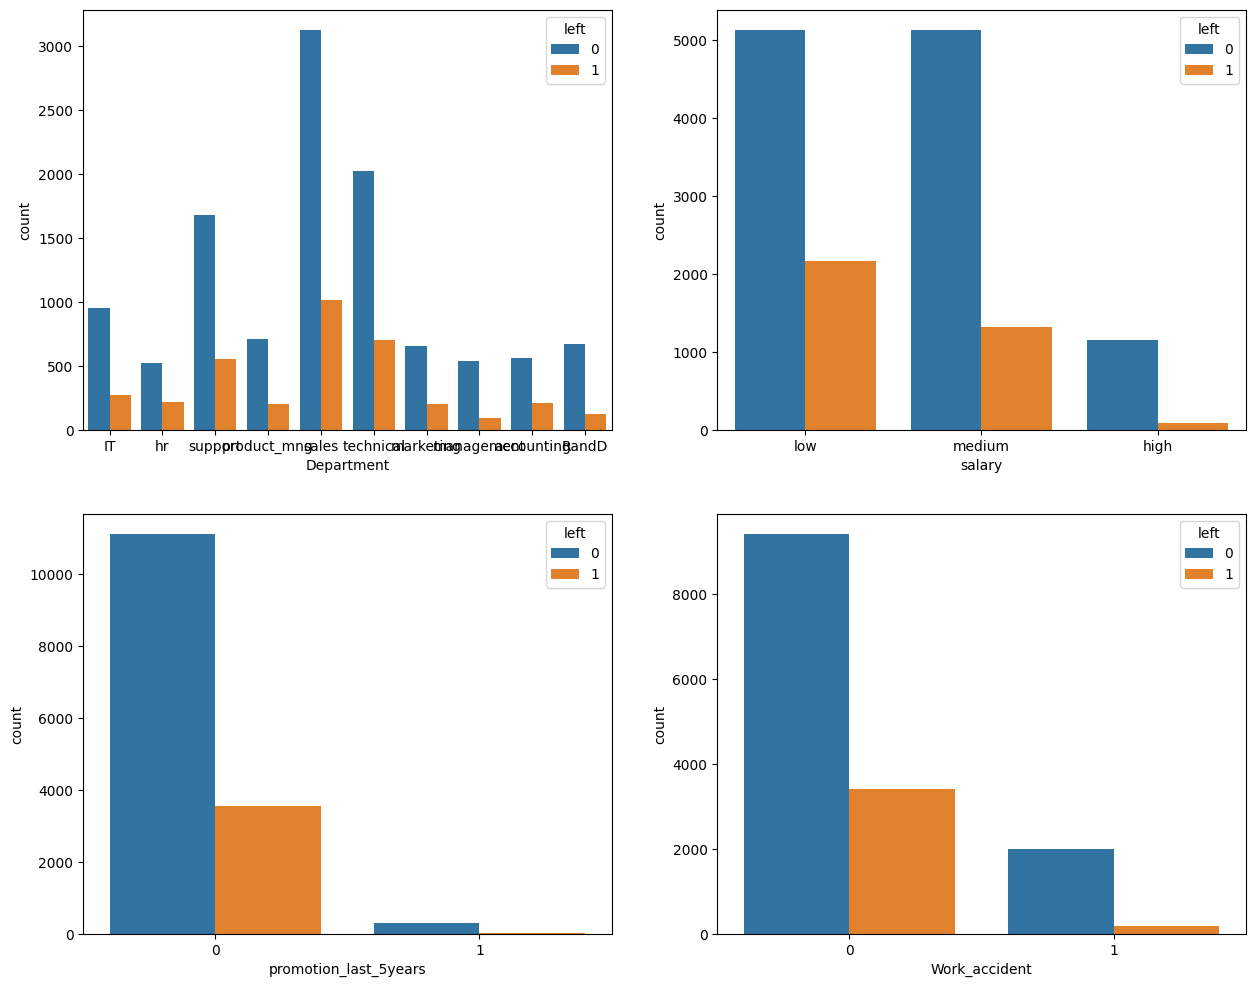

In [16]:
fig, axes = plt.subplots(2,2,figsize=(15,12))

sns.countplot(x='Department',hue='left',data=df,ax=axes[0,0])
sns.countplot(x='salary',hue='left',data=df,ax=axes[0,1])
sns.countplot(x='promotion_last_5years',hue='left',data=df,ax=axes[1,0])
sns.countplot(x='Work_accident',hue='left',data=df,ax=axes[1,1])

## Data preprocessing 

 1. Check || Handling missing values

 2. Encoding categorical features

 3. Split the Dataset

### Missing data handling

   ### Deletion
    * row: if target or label(y) is missing: if entire row is missing we drop the rows.

    * Columns: if a column contains > 70% data missing we drop column.


  ### Imputation(fill in missing value)
    * mean
    * median
    * mode

    Note:

      if the entire row is missing so we drop the rows.


In [17]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         4
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

<Axes: >

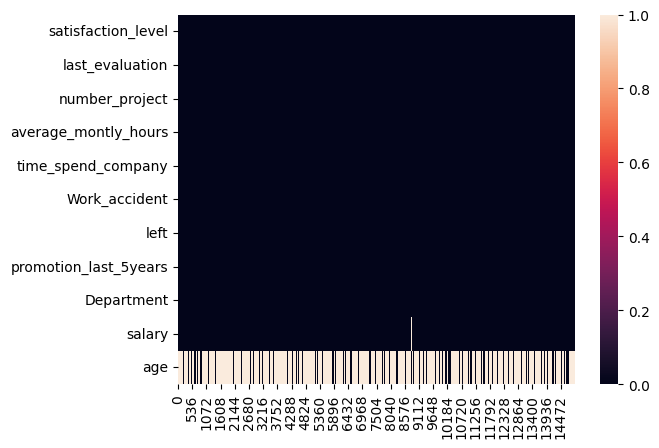

In [18]:
sns.heatmap(df.isna().T)

In [19]:
# drope the null rows
df.dropna(inplace=True)

In [20]:
# delete the column if data contain more than 70% data will be missing
del df['age']

In [21]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [22]:
df['Work_accident'] = df['Work_accident'].astype(int)
df['left'] = df['left'].astype(int)
df['promotion_last_5years'] = df['promotion_last_5years'].astype(int)

In [23]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int32
left                       int32
promotion_last_5years      int32
Department                object
salary                    object
dtype: object

<Axes: >

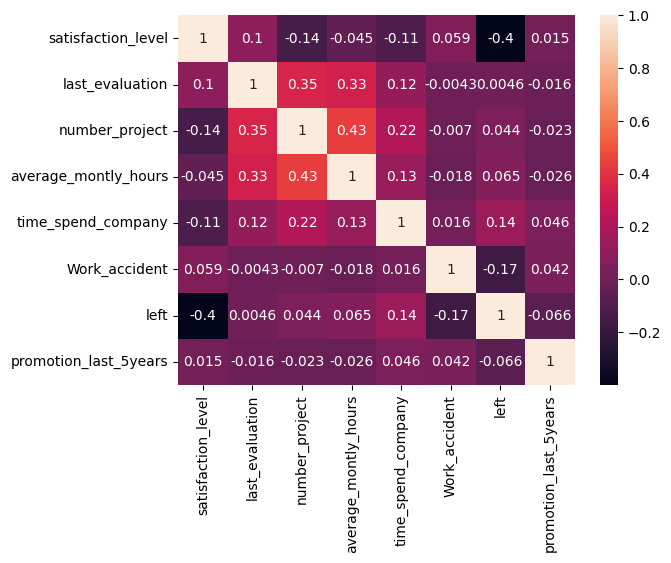

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Encoding categorical data
 * Salary -> We need to use the ordinal/Label encoding  because salary column has a 3 unique values(low, medium and high) 

 * Department -> We need to use the One hot encoding because Department columns has 10 unique values which represent Nominal variables.


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [26]:
# Implementing one-hot encoding on the 'Department' feature
df_encoded = pd.get_dummies(df,columns=['Department'],drop_first=True)

# Label encoding of 'salary' feature
le = LabelEncoder()
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
1,0.40,0.49,2,155,3,0,1,0,2,False,False,True,False,False,False,False,False,False
9,0.42,0.52,2,141,3,1,1,0,2,False,False,False,False,False,False,True,False,False
10,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
17,0.73,0.55,4,267,3,0,0,0,1,False,False,False,False,False,False,True,False,False
19,0.61,0.98,2,238,4,0,0,0,2,False,False,False,False,False,False,False,True,False


### Feature Engineering



In [27]:
X = df_encoded.drop(columns='left')
y = df.left

In [28]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
1,0.40,0.49,2,155,3,0,0,2,False,False,True,False,False,False,False,False,False
9,0.42,0.52,2,141,3,1,0,2,False,False,False,False,False,False,True,False,False
10,0.11,0.88,7,272,4,0,0,2,False,False,False,False,False,False,True,False,False
17,0.73,0.55,4,267,3,0,0,1,False,False,False,False,False,False,True,False,False
19,0.61,0.98,2,238,4,0,0,2,False,False,False,False,False,False,False,True,False


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lr = LogisticRegression(max_iter=500)
lr.fit(X,y)


LogisticRegression(max_iter=500)

In [31]:
svc = SVC()
svc.fit(X,y)

SVC()

In [32]:
# using logistic
y_pred1 = lr.predict(X_test)

# using svc
y_pred2 = svc.predict(X_test)

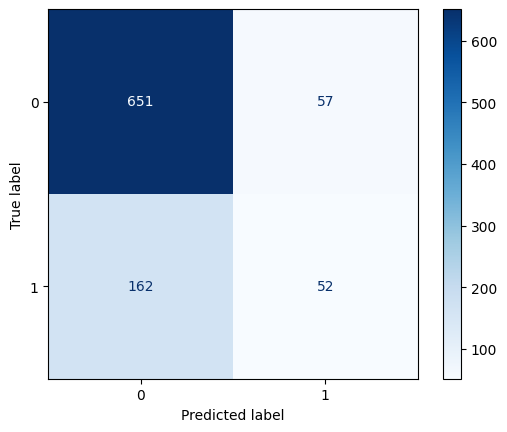

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test,cmap='Blues')

*  The confusion matrix classifier  predicting the presence of a employee activities.
* The classifier made a total 922 predictions Out of those 922 cases, the classifire predicted "yes" 109 times and "no" 813 times.
* In reality, 214 employee in the sample have the left, and 708 patients do not.

In [34]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       708
           1       0.48      0.24      0.32       214

    accuracy                           0.76       922
   macro avg       0.64      0.58      0.59       922
weighted avg       0.73      0.76      0.73       922



In [35]:
print(f'Acciracy Score {accuracy_score(y_test,y_pred1)}')

Acciracy Score 0.762472885032538


In [36]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
data

,Actual,Predicted
13150,0,0
8496,0,0
12234,0,1
921,1,0
1119,0,0
...,...,...
5876,0,1
5870,0,0
8931,0,0
7686,0,0


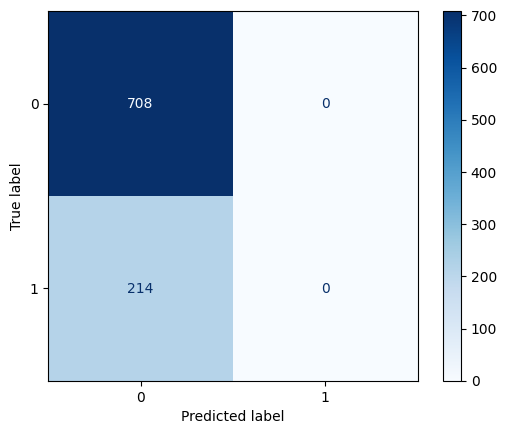

In [37]:
ConfusionMatrixDisplay.from_estimator(svc,X_test,y_test,cmap='Blues')

In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       708
           1       0.00      0.00      0.00       214

    accuracy                           0.77       922
   macro avg       0.38      0.50      0.43       922
weighted avg       0.59      0.77      0.67       922



C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [39]:
print(f'Acciracy Score {accuracy_score(y_test,y_pred2)}')

Acciracy Score 0.7678958785249458


In [40]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
data1.sample(10)

,Actual,Predicted
12501,0,0
13813,0,0
4979,1,0
3827,1,0
9810,0,0
11509,0,0
11368,0,0
1714,0,0
14150,1,0
3465,0,0
